<a href="https://colab.research.google.com/github/thummapalasuresh/ML_-projects/blob/main/Gold_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dependecies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**Data collection and preprocessing**

In [ ]:
df= pd.read_csv("/content/gld_price_data.csv")
#print top 5 rows
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#print last 5 rows
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#shape of the dataset
df.shape

(2290, 6)

In [ ]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking the weaher the data have any null values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
#statistical analaysis
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
#correlation
df.corr()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


**correlation of the data set by using heat map**

positive correlation means if one feature increases automatically another feature also increase vice versa

Negaive correlation means if one feature will increases automatically the next feature will dectrease


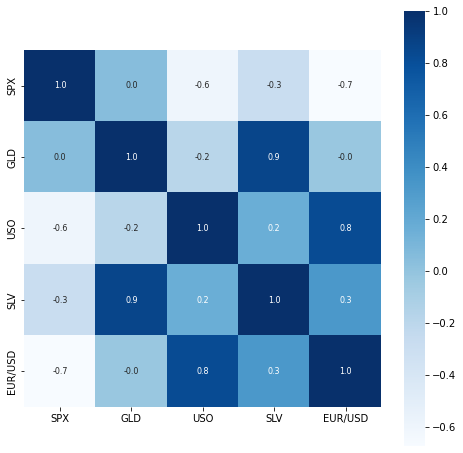

In [31]:
correlation = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True,square=True,fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [34]:
#To see the correlation individual of features
print(correlation['GLD'])
print(correlation['SLV'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64
SPX       -0.274055
GLD        0.866632
USO        0.167547
SLV        1.000000
EUR/USD    0.321631
Name: SLV, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


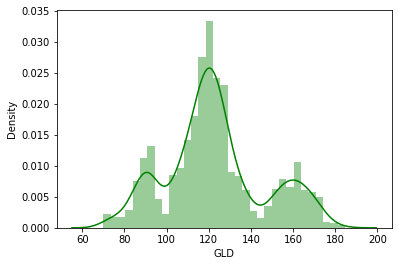

In [44]:
#checking the distribution of the GLD price
sns.distplot(df['GLD'], color='g')
plt.show()

#splitting the features for model

In [47]:
x= df.drop(['Date','GLD'],axis=1)
y=df['GLD']
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**spliting into traing and testing the data**

In [91]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)

**Model training : Random forest Regressor**

In [92]:
regressor= RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor()

**Model evaluation**

In [93]:
#prediction testing the data_set
predict= regressor.predict(x_test)
predict

array([168.6448996 ,  82.07859977, 116.30480017, 127.63710056,
       120.6966011 , 154.59649777, 149.55579822, 126.0871006 ,
       117.52439887, 126.01810021, 116.4070016 , 171.68250078,
       141.45499867, 167.634398  , 115.19520014, 117.64960033,
       137.89780259, 169.79080011, 159.04050171, 158.48779956,
       155.14630071, 125.41680021, 176.52110027, 157.3407033 ,
       125.20730057,  93.77019972,  77.43470017, 120.52620004,
       119.16169955, 167.47579974,  88.1486003 , 125.34089997,
        91.13400059, 117.62920008, 121.16399904, 136.03250082,
       115.56850151, 114.92420056, 148.08640064, 107.37400079,
       104.35360247,  87.20789783, 126.58800066, 117.62260009,
       153.67219913, 119.59240015, 108.48009942, 108.16809834,
        93.02220042, 127.18959763,  74.71180043, 113.67529918,
       121.51519996, 111.3586991 , 118.8706988 , 121.02829911,
       159.86359964, 166.58740125, 146.94409649,  85.69539828,
        94.43530032,  86.85129919,  90.53200019, 119.09

In [94]:
#R squared_error
err_score= metrics.r2_score(y_test,predict)
print("the accuracy score of testing data :", err_score)

the accuracy score of testing data : 0.9898357899072313


In [95]:
predict2= regressor.predict(x_train)
predict2

array([109.96489785, 114.87120074,  90.62349996, ..., 130.44379663,
       159.554796  , 114.91229954])

In [96]:
#r_squared error for traing data
err_score2= metrics.r2_score(y_train,predict2)
print("the accuracy score of the traing data :", err_score2)

the accuracy score of the traing data : 0.9984907633556421


In [99]:
y_test=list(y_test)

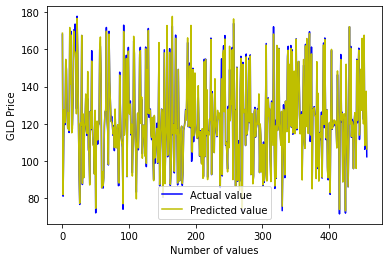

In [100]:
plt.plot(y_test, color="b", label= "Actual value")
plt.plot(predict,color="y", label="Predicted value")

plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

Text(0.5, 0, 'Number of values')

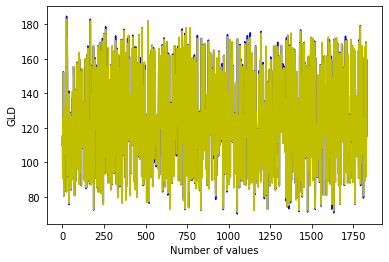

In [98]:
y_train= list(y_train)
plt.plot(y_train,color='b')
plt.plot(predict2, color='y')
plt.ylabel('GLD')
plt.xlabel('Number of values')